In [131]:
# Set the working directory to the desired path

import os
import matplotlib.pyplot as plt

path = 'C:/Users/MaxBo/OneDrive/Documents/Class MQE/Evidence Based Analysis/Portugal Endangered Species'

os.chdir(path)



In [132]:
#import pandas as pd

#pd.set_option('display.max_rows', 8)

endangered = pd.read_csv('Intersected_Areas_Endangered.csv')

In [133]:
#Check length
len(endangered)

7827

In [134]:
endangered.head()

,id_no,sci_name,presence,origin,seasonal,compiler,yrcompiled,citation,subspecies,subpop,...,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO3,ISO3,SUPP_INFO,CONS_OBJ,protected_area_ha
0,1904,Apodemus sylvaticus,1,1,1,IUCN,2014,IUCN (International Union for Conservation of ...,NaN,NaN,...,Not Reported,Not Reported,State Verified,988,PT-14,PRT,PRT,Not Applicable,Not Applicable,1218
1,1904,Apodemus sylvaticus,1,1,1,IUCN,2014,IUCN (International Union for Conservation of ...,NaN,NaN,...,Not Reported,Management plan is not implented and not avail...,State Verified,1856,PT-06,PRT,PRT,Not Applicable,Not Applicable,232
2,1904,Apodemus sylvaticus,1,1,1,IUCN,2014,IUCN (International Union for Conservation of ...,NaN,NaN,...,Not Reported,Management plan is not implented but is available,State Verified,1856,PT-08,PRT,PRT,Not Applicable,Not Applicable,8679
3,1904,Apodemus sylvaticus,1,1,1,IUCN,2014,IUCN (International Union for Conservation of ...,NaN,NaN,...,Not Reported,Management plan is not implented but is available,State Verified,1856,Not Reported,PRT,PRT,Not Applicable,Not Applicable,3537
4,1904,Apodemus sylvaticus,1,1,1,IUCN,2014,IUCN (International Union for Conservation of ...,NaN,NaN,...,Not Reported,Management plan is not implented and not avail...,State Verified,1856,PT-15,PRT,PRT,Not Applicable,Not Applicable,20034


In [135]:
#look at columns
endangered.columns

Index(['id_no', 'sci_name', 'presence', 'origin', 'seasonal', 'compiler',
       'yrcompiled', 'citation', 'subspecies', 'subpop', 'source', 'island',
       'tax_comm', 'dist_comm', 'generalisd', 'legend', 'kingdom', 'phylum',
       'class', 'order_', 'family', 'genus', 'category', 'marine',
       'terrestria', 'freshwater', 'SHAPE_Leng', 'SHAPE_Area',
       'habitat_area_ha', 'OBJECTID', 'WDPAID', 'WDPA_PID', 'PA_DEF', 'NAME',
       'ORIG_NAME', 'DESIG', 'DESIG_ENG', 'DESIG_TYPE', 'IUCN_CAT', 'INT_CRIT',
       'MARINE_2', 'REP_M_AREA', 'GIS_M_AREA', 'REP_AREA', 'GIS_AREA',
       'NO_TAKE', 'NO_TK_AREA', 'STATUS', 'STATUS_YR', 'GOV_TYPE', 'OWN_TYPE',
       'MANG_AUTH', 'MANG_PLAN', 'VERIF', 'METADATAID', 'SUB_LOC',
       'PARENT_ISO3', 'ISO3', 'SUPP_INFO', 'CONS_OBJ', 'protected_area_ha'],
      dtype='object')

In [136]:
#group by animal ID and sum their intersections with protected area
#All intersections were completed in QGIS, check methodology section of powerpoint

endangered_grouped = endangered.groupby('id_no')['protected_area_ha'].sum().reset_index()

In [137]:
endangered_grouped

,id_no,protected_area_ha
0,1904,2688839
1,2553,1291072
2,3746,1050466
3,3798,126804
...,...,...
61,221686277,952337
62,221687974,147672
63,221730864,799062
64,230918147,2669405


In [138]:
#keep necessary columns

columns = ['id_no','sci_name','SHAPE_Leng','SHAPE_Area','habitat_area_ha']

endangered_og = endangered[columns]

In [139]:
#A group by statement that groups by ID and keeps all static data as it is

endangered_og = endangered_og.groupby('id_no').agg({
    'sci_name': 'first',          
    'SHAPE_Leng': 'first',
    'SHAPE_Area': 'first',
    'habitat_area_ha':'first',
}).reset_index()


In [140]:
#now we can merge for a final dataset

endangered_final = pd.merge(endangered_og, endangered_grouped, on='id_no')

In [141]:
endangered_final.head()

,id_no,sci_name,SHAPE_Leng,SHAPE_Area,habitat_area_ha,protected_area_ha
0,1904,Apodemus sylvaticus,1013.264728,609.708716,8640057,2688839
1,2553,Barbastella barbastellus,349.319876,425.504252,4576528,1291072
2,3746,Canis lupus,3114.275260,7142.498544,3035200,1050466
3,3798,Capra pyrenaica,20.008672,1.046901,96552,126804
4,7618,Eliomys quercinus,227.687196,178.313489,5103190,1650972


In [142]:
#Calculate percent coverage of protected area of habitat

endangered_final['protection_coverage_pct'] = (endangered_final['protected_area_ha'] / endangered_final['habitat_area_ha'])*100

In [143]:
#Some of our protection coverages exceed 100%
#most likely due to polygon errors in QGIS intersection algorithm

pd.set_option('display.max_rows', None)
endangered_final

,id_no,sci_name,SHAPE_Leng,SHAPE_Area,habitat_area_ha,protected_area_ha,protection_coverage_pct
0,1904,Apodemus sylvaticus,1013.264728,609.708716,8640057,2688839,31.120616
1,2553,Barbastella barbastellus,349.319876,425.504252,4576528,1291072,28.210731
2,3746,Canis lupus,3114.275260,7142.498544,3035200,1050466,34.609449
3,3798,Capra pyrenaica,20.008672,1.046901,96552,126804,131.332339
4,7618,Eliomys quercinus,227.687196,178.313489,5103190,1650972,32.351764
5,12520,Lynx pardinus,0.915644,0.013368,12835,47827,372.629529
6,12848,Martes martes,919.265063,1346.695151,3577690,1083098,30.273668
7,13418,Microtus cabrerae,40.661615,12.230320,3733472,1150729,30.821953
8,13493,Microtus duodecimcostatus,84.841355,56.823759,3455330,1041779,30.149913
9,13494,Microtus lusitanicus,47.490496,27.403951,6736213,1785763,26.509895


In [144]:
#After troubleshooting in QGIS and analyzing the individual layers, I have come to the conclusion
#that the problem was that the protected area layers sometimes overlapped with each other

#This creates some regions that are double counted and therefore allows some animals to have
#protection coverage percentages over 100

#To solve this, I must combine the polygons for the protected areas

In [218]:
#Import new dataset

endangered = pd.read_csv('Endangered_Intersected_One.csv')

In [219]:
pd.set_option('display.max_rows', 8)
endangered

,OBJECTID,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,...,family,genus,category,marine_2,terrestria,freshwater,SHAPE_Leng,SHAPE_Area,habitat_area_ha,protected_area_ha
0,1,109088,109088,1,Complexo Vulcânico das Sete Cidades,Complexo Vulcânico das Sete Cidades,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,...,MURIDAE,Apodemus,LC,False,True,False,1013.264728,609.708716,8640057,1718714
1,1,109088,109088,1,Complexo Vulcânico das Sete Cidades,Complexo Vulcânico das Sete Cidades,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,...,VESPERTILIONIDAE,Barbastella,NT,False,True,False,349.319876,425.504252,4576528,831482
2,1,109088,109088,1,Complexo Vulcânico das Sete Cidades,Complexo Vulcânico das Sete Cidades,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,...,CANIDAE,Canis,LC,False,True,False,3114.275260,7142.498544,3035200,639916
3,1,109088,109088,1,Complexo Vulcânico das Sete Cidades,Complexo Vulcânico das Sete Cidades,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,...,BOVIDAE,Capra,LC,False,True,False,20.008672,1.046901,96552,47935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,1,109088,109088,1,Complexo Vulcânico das Sete Cidades,Complexo Vulcânico das Sete Cidades,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,...,SCIURIDAE,Sciurus,LC,False,True,False,2.680127,0.234410,222710,18067
67,1,109088,109088,1,Complexo Vulcânico das Sete Cidades,Complexo Vulcânico das Sete Cidades,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,...,SCIURIDAE,Sciurus,LC,False,True,False,1668.989826,3766.366743,2301125,486596
68,1,109088,109088,1,Complexo Vulcânico das Sete Cidades,Complexo Vulcânico das Sete Cidades,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,...,SCIURIDAE,Sciurus,LC,False,True,False,307.420023,25.726959,19,19
69,1,109088,109088,1,Complexo Vulcânico das Sete Cidades,Complexo Vulcânico das Sete Cidades,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,...,MINIOPTERIDAE,Miniopterus,VU,False,True,False,565.493996,305.801144,8620241,1707986


In [220]:
endangered.columns

Index(['OBJECTID', 'WDPAID', 'WDPA_PID', 'PA_DEF', 'NAME', 'ORIG_NAME',
       'DESIG', 'DESIG_ENG', 'DESIG_TYPE', 'IUCN_CAT', 'INT_CRIT', 'MARINE',
       'REP_M_AREA', 'GIS_M_AREA', 'REP_AREA', 'GIS_AREA', 'NO_TAKE',
       'NO_TK_AREA', 'STATUS', 'STATUS_YR', 'GOV_TYPE', 'OWN_TYPE',
       'MANG_AUTH', 'MANG_PLAN', 'VERIF', 'METADATAID', 'SUB_LOC',
       'PARENT_ISO3', 'ISO3', 'SUPP_INFO', 'CONS_OBJ', 'id_no', 'sci_name',
       'presence', 'origin', 'seasonal', 'compiler', 'yrcompiled', 'citation',
       'subspecies', 'subpop', 'source', 'island', 'tax_comm', 'dist_comm',
       'generalisd', 'legend', 'kingdom', 'phylum', 'class', 'order_',
       'family', 'genus', 'category', 'marine_2', 'terrestria', 'freshwater',
       'SHAPE_Leng', 'SHAPE_Area', 'habitat_area_ha', 'protected_area_ha'],
      dtype='object')

In [221]:
#keep necessary columns

columns = ['sci_name','order_','SHAPE_Leng','SHAPE_Area','habitat_area_ha','protected_area_ha']

endangered_cut = endangered[columns]

In [222]:
#Some of the animals have multiple entries due to having multiple polygons. We will group by
#animal and sum their protected area to fix this.

endangered_cut['sci_name'].value_counts()

Sciurus vulgaris             3
Crocidura gueldenstaedtii    2
Lynx pardinus                2
Felis silvestris             2
                            ..
Erinaceus europaeus          1
Crocidura russula            1
Sorex granarius              1
Miniopterus schreibersii     1
Name: sci_name, Length: 65, dtype: int64

In [223]:
#go through with the fix

endangered_cut = endangered_cut.groupby('sci_name').agg({
        'order_':'first',
    'SHAPE_Leng': 'first',
    'SHAPE_Area': 'first',
    'habitat_area_ha':'sum',
    'protected_area_ha':'sum'
}).reset_index()

In [224]:
#Our target is 65 unique animals

len(endangered_cut)

65

In [225]:
#Calculate percent coverage of protected area of habitat

endangered_cut['protection_coverage_pct'] = (endangered_cut['protected_area_ha'] / endangered_cut['habitat_area_ha'])*100

In [226]:
#And finally we have no more errors in our dataset. Now we can move to analysis

pd.set_option('display.max_rows', None)
endangered_cut

,sci_name,order_,SHAPE_Leng,SHAPE_Area,habitat_area_ha,protected_area_ha,protection_coverage_pct
0,Apodemus sylvaticus,RODENTIA,1013.264728,609.708716,8640057,1718714,19.892392
1,Arvicola scherman,RODENTIA,89.779001,98.751947,112413,60636,53.940381
2,Barbastella barbastellus,CHIROPTERA,349.319876,425.504252,4576528,831482,18.168402
3,Canis lupus,CARNIVORA,3114.275260,7142.498544,3035200,639916,21.083158
4,Capra pyrenaica,ARTIODACTYLA,20.008672,1.046901,96552,47935,49.646822
5,Capreolus capreolus,ARTIODACTYLA,867.899127,814.397845,4061142,747441,18.404700
6,Cervus elaphus,ARTIODACTYLA,783.906468,531.266546,841887,294394,34.968351
7,Crocidura gueldenstaedtii,EULIPOTYPHLA,5.905923,0.419082,5342873,933141,17.465154
8,Crocidura russula,EULIPOTYPHLA,209.692521,213.171480,8644515,1723080,19.932639
9,Dama dama,ARTIODACTYLA,481.308513,470.760373,8640103,1718749,19.892691


## We will be looking at a couple things.
- Distribution of our protected area percentages
- Analysis of the taxonomic class of order
- Analysis of individual animals

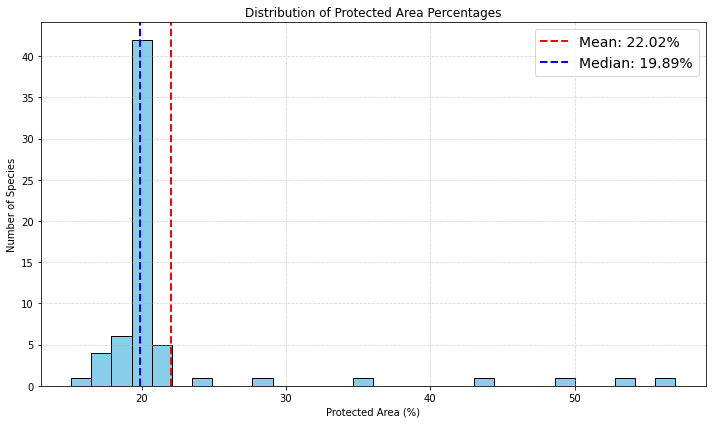

In [235]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(endangered_cut['protection_coverage_pct'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Protected Area Percentages')
plt.xlabel('Protected Area (%)')
plt.ylabel('Number of Species')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

mean_value = endangered_cut['protection_coverage_pct'].mean()
median_value = endangered_cut['protection_coverage_pct'].median()

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}%')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}%')


plt.legend(fontsize=14)

#plt.savefig('Endangered_Distribution.jpg',bbox_inches='tight', dpi=300, format='jpg')
plt.show()


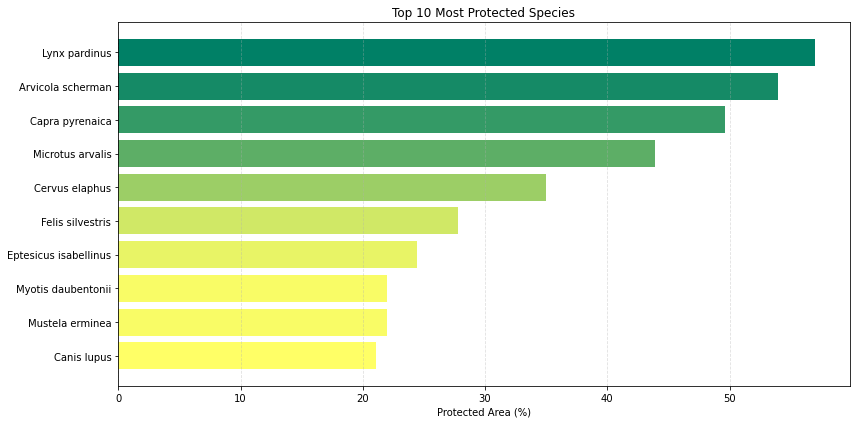

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sort and get top 10 protected species
top_protected = endangered_cut.sort_values('protection_coverage_pct', ascending=False).head(10)

# Normalize protected_pct for color mapping
norm = plt.Normalize(top_protected['protection_coverage_pct'].min(), top_protected['protection_coverage_pct'].max())
colors = plt.cm.summer_r(norm(top_protected['protection_coverage_pct']))  


plt.figure(figsize=(12, 6))
bars = plt.barh(top_protected['sci_name'], top_protected['protection_coverage_pct'], color=colors)
plt.xlabel('Protected Area (%)')
plt.title('Top 10 Most Protected Species')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()

#plt.savefig('Ten_Most_Protected.jpg',bbox_inches='tight', dpi=300, format='jpg')

plt.show()



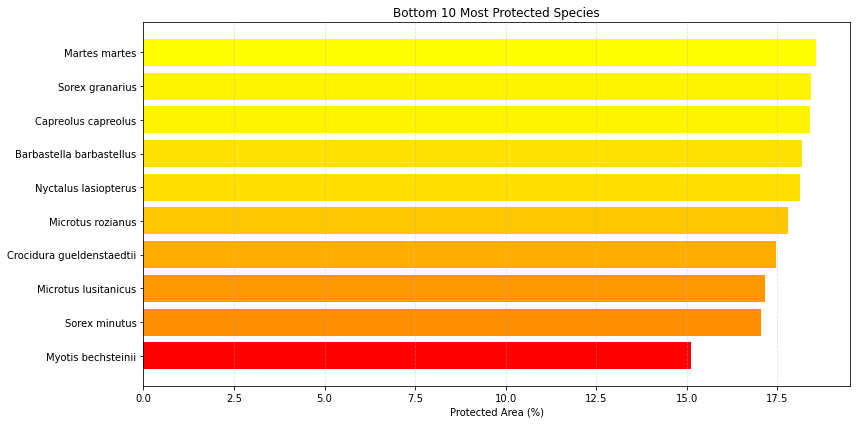

In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sort and get bottom 10 protected species
bottom_protected = endangered_cut.sort_values('protection_coverage_pct', ascending=False).tail(10)

# Normalize protected_pct for color mapping
norm = plt.Normalize(bottom_protected['protection_coverage_pct'].min(), bottom_protected['protection_coverage_pct'].max())
colors = plt.cm.autumn(norm(bottom_protected['protection_coverage_pct']))  


plt.figure(figsize=(12, 6))
bars = plt.barh(bottom_protected['sci_name'], bottom_protected['protection_coverage_pct'], color=colors)
plt.xlabel('Protected Area (%)')
plt.title('Bottom 10 Most Protected Species')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()

#plt.savefig('Ten_Bottom_Protected.jpg',bbox_inches='tight', dpi=300, format='jpg')

plt.show()


In [257]:
#Now we will group by order

avg_protected_by_order = endangered_cut.groupby('order_')['protection_coverage_pct'].mean().reset_index()

In [258]:
avg_protected_by_order

,order_,protection_coverage_pct
0,ARTIODACTYLA,28.560964
1,CARNIVORA,23.797796
2,CHIROPTERA,19.920529
3,EULIPOTYPHLA,18.978605
4,LAGOMORPHA,19.888045
5,RODENTIA,24.013546


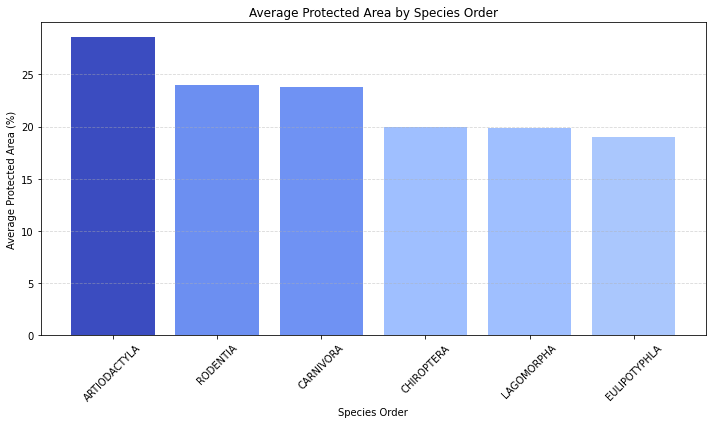

In [270]:
import pandas as pd
import matplotlib.pyplot as plt



# Sort by average protection descending
avg_protected_by_order = avg_protected_by_order.sort_values('protection_coverage_pct', ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_protected_by_order['order_'], avg_protected_by_order['protection_coverage_pct'], color=plt.cm.coolwarm_r(
    avg_protected_by_order['protection_coverage_pct'] / avg_protected_by_order['protection_coverage_pct'].max()
))

plt.title('Average Protected Area by Species Order')
plt.ylabel('Average Protected Area (%)')
plt.xlabel('Species Order')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

#plt.savefig('Order_Ranked.jpg',bbox_inches='tight', dpi=300, format='jpg')

plt.show()
